<a href="https://colab.research.google.com/github/RawanKhaled20/Sentimental-analysis/blob/main/sentimental_analysis_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rawankhaled20","key":"f5a17aecb67ca4675b425dadbe4ab60e"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset            Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          15355        330  1.0              
nelgiriyewithana/billionaires-statistics-dataset              Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           8251        207  1.0              
asaniczka/top-spotify-songs-in-73-countries-daily-updated     Top Spotify Songs in 73 Countries (Daily Updated)    4MB  2023-10-31 23:37:13           1784         57  1.0              
jeremylarcher/canadian-house-prices-for-top-cities            Canadian hous

In [6]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 156MB/s]


In [7]:
! unzip twitter-entity-sentiment-analysis.zip

Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None
import os #File location
from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
import re #Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
#Validation dataset
val=pd.read_csv("twitter_validation.csv", header=None)
#Full dataset for Train-Test
train=pd.read_csv("twitter_training.csv", header=None)

In [10]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [12]:
train_data=train #[(train["type"] == "Positive") | (train["type"] == "Negative")]
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [13]:
val_data=val #[(val["type"] == "Positive") | (val["type"] == "Negative")]
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [15]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


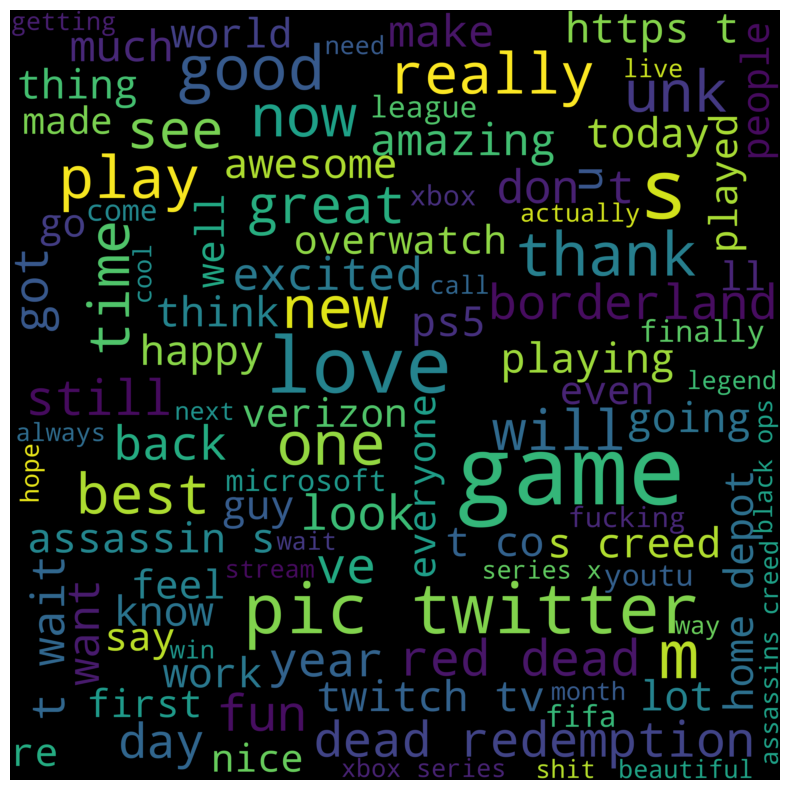

In [110]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

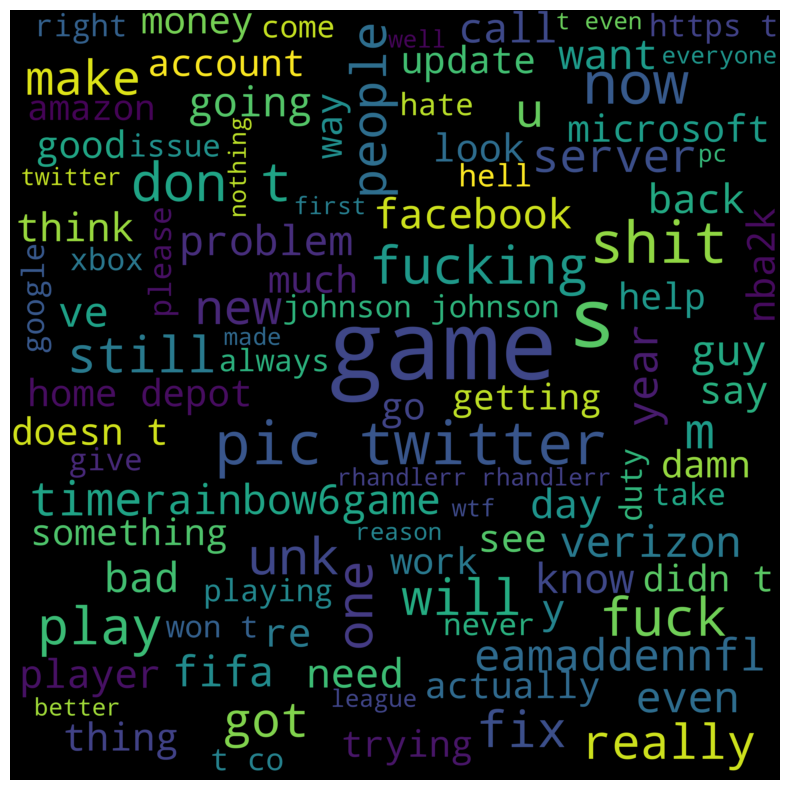

In [111]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

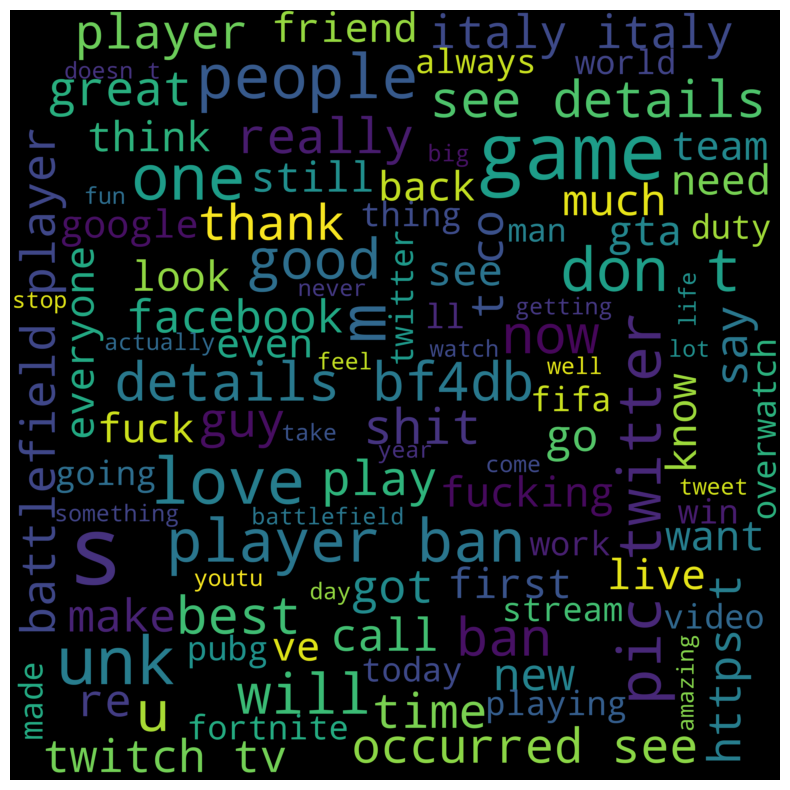

In [112]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

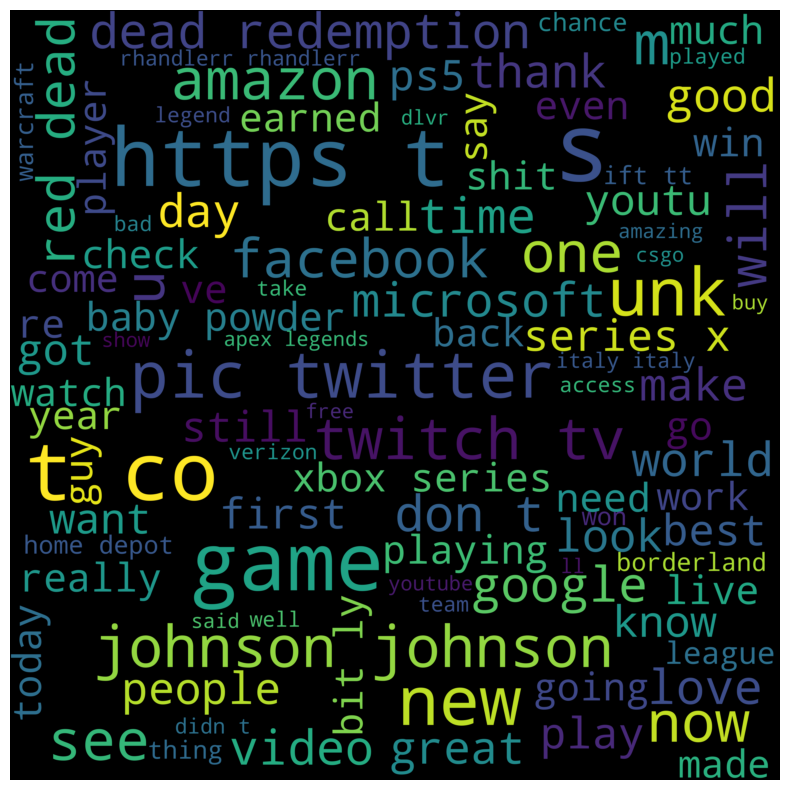

In [113]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
#Count information per category
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


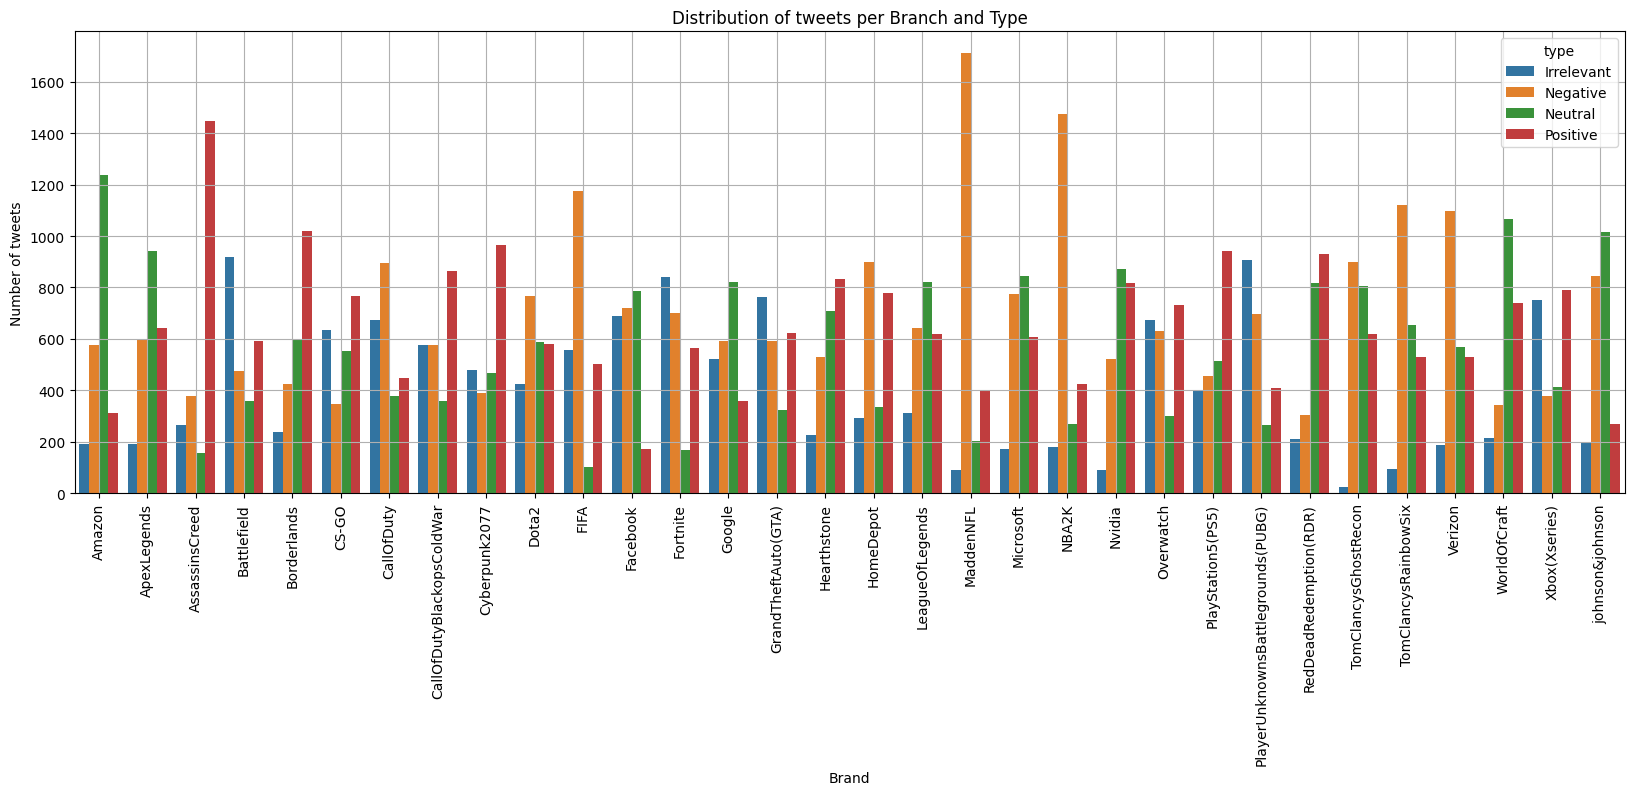

In [ ]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [17]:
nltk.download('punkt')

#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of tokens:  30436


In [18]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [19]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [20]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [21]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [22]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [ ]:
pickle.dump(bow_counts, open('/content/model_vector2', 'wb'))

In [ ]:
X_test_bow

<14937x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 161222 stored elements in Compressed Sparse Row format>

In [23]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [24]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: type, dtype: float64

In [25]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  81.50900448550578


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Assuming 'new_review' contains the new review you want to predict
new_review = "recommended"

# 2. Transform the new review using the existing 'bow_counts' and make a prediction
new_review_bow = bow_counts.transform([new_review.lower()])  # Transform the new review
predicted_sentiment = model1.predict(new_review_bow)  # Make a prediction

print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: ['Positive']


In [26]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [ ]:
X_val_bow

<1000x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 12913 stored elements in Compressed Sparse Row format>

In [27]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  91.7


In [28]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_bow

<59745x1427378 sparse matrix of type '<class 'numpy.int64'>'
	with 4142213 stored elements in Compressed Sparse Row format>

In [29]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=200)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  89.95782285599519


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
y_val_bow = val_data['type']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.2


In [95]:
# Assuming 'new_review' contains the new review you want to predict
new_review = "Easy to put together! We use it as a snack table but you can store anything in here really. I plan on getting another one in the same color"

# 2. Transform the new review using the existing 'bow_counts' and make a prediction
new_review_bow = bow_counts.transform([new_review.lower()])  # Transform the new review
predicted_sentiment = model2.predict(new_review_bow)  # Make a prediction

print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: ['Irrelevant']


In [ ]:
from joblib import dump

# Assuming 'model' is your trained model
# Replace 'model' with the actual variable name of your trained model
dump(model2, 'sentimental analysis.joblib')

['sentimental analysis.joblib']

In [ ]:
import pickle

pickle.dump(model2, open('/content/model_saved', 'wb'))

model_load=pickle.load(open('/content/model_saved', 'rb'))

In [ ]:
model_load.predict(X_test_bow)

array(['Negative', 'Neutral', 'Neutral', ..., 'Negative', 'Neutral',
       'Irrelevant'], dtype=object)

In [ ]:
from google.colab import files
files.upload()

In [33]:
test=pd.read_excel("Amazon.xlsx")

In [38]:
test.columns=['product','review','type','link']

# Convert the 'review' column to lowercase
test['review'] = test['review'].str.lower()

# Convert all values in the 'review' column to strings
test['review'] = test['review'].astype(str)

# Remove non-alphanumeric characters using a regular expression
test['review'] = test['review'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [39]:
test['review']

0                                  good dual dash camera
1                                         so far so good
2                                    drains your battery
3      tucson az  freezes on hot days   multiple issu...
4                    don t bother with this buggy camera
                             ...                        
414    on my third pair of ghost 14 s provided i stre...
415    loved these at first but after 9 or ten wearin...
416    not really sure what happened with these shoes...
417                  struggling to find marathon shoes  
418    a few years ago  i went to a specialist store ...
Name: review, Length: 419, dtype: object

In [58]:
# Convert the 'review' column to lowercase
test['type'] = test['type'].str.lower()

# Convert all values in the 'review' column to strings
test['type'] = test['type'].astype(str)

# Remove non-alphanumeric characters using a regular expression
test['type'] = test['type'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [90]:
y_true=test['type']
y_true

0      positive
1      positive
2      negative
3      negative
4      negative
         ...   
414    positive
415    negative
416    negative
417     neutral
418    positive
Name: type, Length: 419, dtype: object

In [105]:
# Create an empty list to store the predictions
predictions = []
y_true = test['type']
count = 0

# Iterate through the 'review' column in the 'test' DataFrame
for review in test['review']:
    # Transform the individual review using the BoW vectorizer
    review_bow = bow_counts.transform([review])

    # Make predictions using model2 for the individual review
    review_prediction = model2.predict(review_bow)
    review_prediction_str = review_prediction[0]  # Get the prediction as a string

    # Handle "Irrelevant" as "Negative"
    if review_prediction_str.lower() == 'irrelevant' or review_prediction_str.lower() == 'positive':
        review_prediction_str = "positive"
    elif review_prediction_str.lower() == 'negative' :
        review_prediction_str = 'negative'
    else:
        review_prediction_str = "neutral"

    # Append the prediction to the list of predictions
    predictions.append(review_prediction_str)

    if review_prediction_str == y_true[i]:
        count += 1

# Print the count and accuracy
print("Correct Predictions:", count)
print("Accuracy:", count / len(predictions))

# Now, 'predictions' contains the predictions for each review in the 'test' DataFrame
print(predictions)

Correct Predictions: 246
Accuracy: 0.5871121718377088
['positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'neutral', 'negative', 'negative', 'negative', 'positive', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'neutral', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'negative', 'negative', 'negative', 'neutral', 'posit

In [108]:
# Filter the DataFrame to keep rows where "prediction" is not equal to "neutra
df = test[test['type'] != 'neutral']
df

,product,review,type,link
0,"S1 4K Dash Cam Front and Rear, 1080P Dual GPS ...",good dual dash camera,positive,NaN
1,"S1 4K Dash Cam Front and Rear, 1080P Dual GPS ...",so far so good,positive,NaN
2,"S1 4K Dash Cam Front and Rear, 1080P Dual GPS ...",drains your battery,negative,NaN
3,"S1 4K Dash Cam Front and Rear, 1080P Dual GPS ...",tucson az freezes on hot days multiple issu...,negative,NaN
4,"S1 4K Dash Cam Front and Rear, 1080P Dual GPS ...",don t bother with this buggy camera,negative,NaN
...,...,...,...,...
413,Brooks Men's Ghost 14 Neutral Running Shoe,overall the shoe is quite comfortable to walk ...,negative,NaN
414,Brooks Men's Ghost 14 Neutral Running Shoe,on my third pair of ghost 14 s provided i stre...,positive,NaN
415,Brooks Men's Ghost 14 Neutral Running Shoe,loved these at first but after 9 or ten wearin...,negative,NaN
416,Brooks Men's Ghost 14 Neutral Running Shoe,not really sure what happened with these shoes...,negative,NaN


In [109]:
predictions = []
y_true = df['type']
count = 0

# Iterate through the 'review' column in the 'test' DataFrame
for review in df['review']:
    # Transform the individual review using the BoW vectorizer
    review_bow = bow_counts.transform([review])

    # Make predictions using model2 for the individual review
    review_prediction = model2.predict(review_bow)
    review_prediction_str = review_prediction[0]  # Get the prediction as a string

    # Handle "Irrelevant" as "Negative"
    if review_prediction_str.lower() == 'irrelevant' or review_prediction_str.lower() == 'positive':
        review_prediction_str = "positive"
    elif review_prediction_str.lower() == 'negative' :
        review_prediction_str = 'negative'
    else:
        review_prediction_str = "neutral"

    # Append the prediction to the list of predictions
    predictions.append(review_prediction_str)

    if review_prediction_str == y_true[i]:
        count += 1

# Print the count and accuracy
print("Correct Predictions:", count)
print("Accuracy:", count / len(predictions))

# Now, 'predictions' contains the predictions for each review in the 'test' DataFrame
print(predictions)

Correct Predictions: 200
Accuracy: 0.5952380952380952
['positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'negative', 'negative', 'negative', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'ne